In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from pyusadel import (
    DifferentialOperators,
    UsadelProblem,
)

In [23]:
Nsites = 1

do = DifferentialOperators()
do.D_x = np.zeros((1, 1), dtype=float)
do.D_y = np.zeros((1, 1), dtype=float)
do.D_z = np.zeros((1, 1), dtype=float)
do.L = np.zeros((1, 1), dtype=float)

h_x = np.array([0.2])
h_y = np.array([0.0])
h_z = np.array([0.0])
tau_sf_inv = np.array([0.0])
tau_so_inv = np.array([0.0])
D = 0
T = 0.2
Gamma = 1e-3

up = UsadelProblem(
    Nsites=1,
    diff_ops=do,
    h_x=h_x,
    h_y=h_y,
    h_z=h_z,
    tau_sf_inv=tau_sf_inv,
    tau_so_inv=tau_so_inv,
    D=D,
    T=T,
    Gamma=Gamma,
)

up.Delta = np.array([1])

In [13]:
# Execute a self-consistent calculation to determine the gap Delta
up.solve_self_consistent(verbose=False)

In [24]:
# Solve for the spectral quantities, first define an energy axis then execute the calculation
up.set_real_omega_ax(-5, 5, 101)
up.solve_spectral(print_exit_status=False, gamma=1)

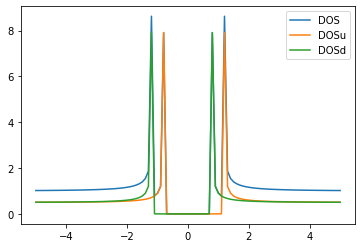

In [25]:
fig, ax = plt.subplots()
ax.plot(up.get_omega_ax_r(), up.get_dos(), label="DOS")
ax.plot(up.get_omega_ax_r(), up.get_spin_resolved_dos("x")[0], label="DOSu")
ax.plot(up.get_omega_ax_r(), up.get_spin_resolved_dos("x")[1], label="DOSd")
ax.legend()

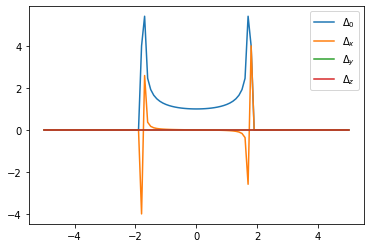

In [16]:
fig, ax = plt.subplots()
ax.plot(up.get_omega_ax_r(), up.get_pairing_amplitudes()[0], label="$\Delta_{0}$")
ax.plot(up.get_omega_ax_r(), up.get_pairing_amplitudes()[1], label="$\Delta_{x}$")
ax.plot(up.get_omega_ax_r(), up.get_pairing_amplitudes()[2], label="$\Delta_{y}$")
ax.plot(up.get_omega_ax_r(), up.get_pairing_amplitudes()[3], label="$\Delta_{z}$")
ax.legend()